In [62]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#file location to pull data
trainData = pd.read_csv('titanic/train.csv')
testData = pd.read_csv('titanic/test.csv')
combine = [train, test]

#prints data from the column values
print(trainData.columns.values)

#since the two data train and test was combine above, when print is used the columns are merged.


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#Finding the differences between the data of survived vs Type

In [7]:
trainData[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Class of survived

NameError: name 'trainData' is not defined

In [8]:
trainData[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False)
# Ages that Survived

NameError: name 'trainData' is not defined

In [9]:
trainData[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)
# Sex Survived

NameError: name 'trainData' is not defined

In [20]:
trainData[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Parent & Child Survived

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [21]:
trainData[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Siblings Survived

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Graphs to visualize Age and PClass

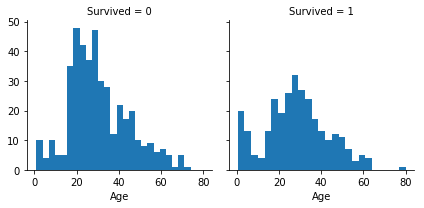

In [22]:
age= sns.FacetGrid(trainData, col='Survived')
age.map(plt.hist, 'Age', alpha=1, bins=25)

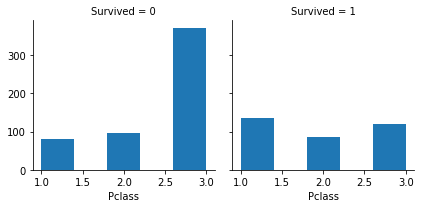

In [31]:
p= sns.FacetGrid(trainData, col='Survived')
p.map(plt.hist, 'Pclass', alpha=1, bins=5)

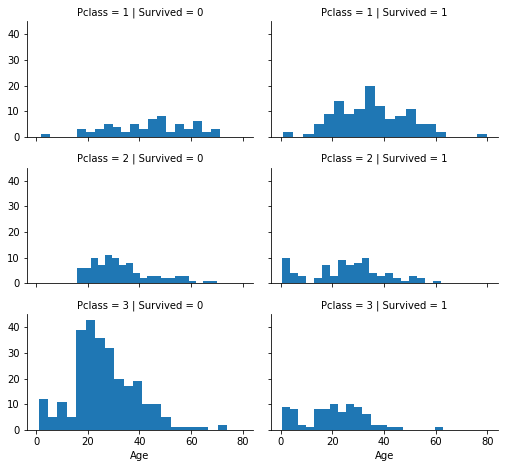

In [36]:
pAge = sns.FacetGrid(trainData, col='Survived', row='Pclass', height=2.2, aspect=1.6)
pAge.map(plt.hist, 'Age', alpha=1, bins=20)
pAge.add_legend();

# From the grid above we can see Higher Class = Higher Survival Rate.

Since we have a better understanding of where to go with the data we adjust our data inputs.

In [2]:
# Converts string male and female to integers


trainData.loc[trainData["Sex"]=="male","Sex"] = 0
trainData.loc[trainData["Sex"]=="female","Sex"] = 1

testData.loc[testData["Sex"]=="male","Sex"] = 0
testData.loc[testData["Sex"]=="female","Sex"] = 1



NameError: name 'trainData' is not defined

In [3]:
X_train = trainData.drop(["Survived","PassengerId"], axis=1)
Y_train = trainData["Survived"]
X_test  = testData.drop("PassengerId", axis=1).copy()

NameError: name 'trainData' is not defined

In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

ValueError: could not convert string to float: Braund, Mr. Owen Harris

In [6]:
submission = pd.DataFrame({
        "PassengerId": testData["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('output/submission.csv', index=False)

NameError: name 'pd' is not defined